In [1]:
from fastai.vision.all import *
import torch
import ipywidgets as widgets

In [2]:
print(torch.cuda.is_available(),torch.backends.cudnn.enabled)

True True


In [3]:
path = untar_data(URLs.PETS)/'images'


In [4]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [5]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.182229,0.031866,0.009472,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.067308,0.019587,0.006766,00:28


In [6]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [7]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [8]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/home/asvataman/anaconda3/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.738652,2.448732,00:03


epoch,train_loss,valid_loss,time
0,1.900586,1.513751,00:01
1,1.635446,1.130496,00:01
2,1.420824,1.163672,00:01
3,1.290367,0.838367,00:01
4,1.159724,0.738401,00:01
5,1.043981,0.683730,00:01
6,0.953189,0.672289,00:01
7,0.883513,0.666402,00:01


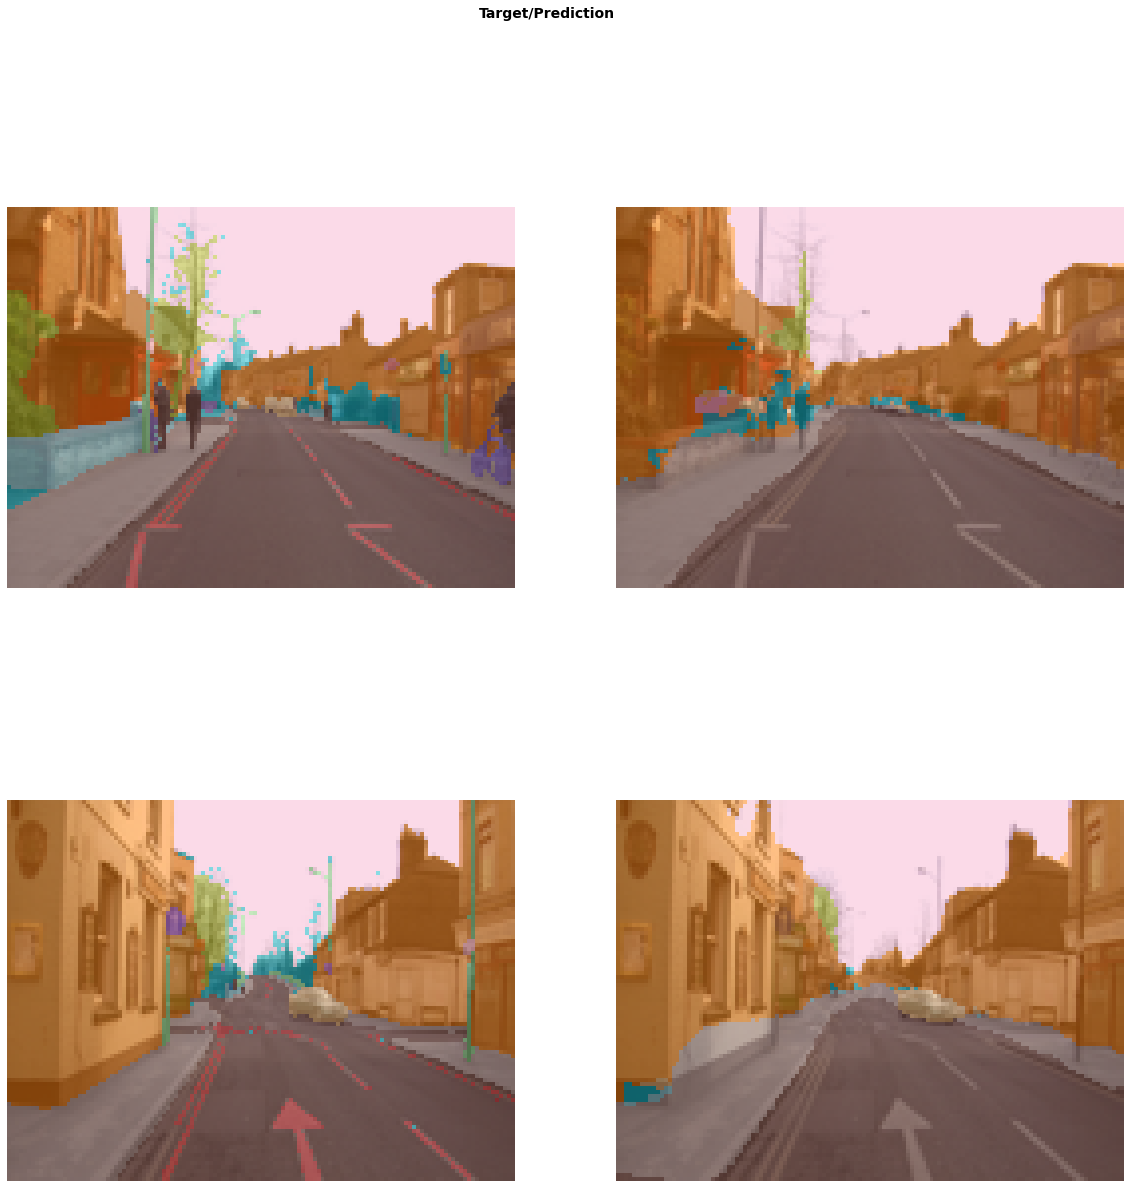

In [20]:
learn.show_results(max_n=2, figsize=(20,20))